# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama:M Fauzan Fachruzi Rauf
- Email:fauzan01rauf@gmail.com
- Id Dicoding:mfauzanfr01

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import joblib

print("Libraries imported successfully!")

Libraries imported successfully!


### Menyiapkan data yang akan diguankan

## Data Understanding

In [2]:
# URL untuk file data mentah (raw) di GitHub
url = 'https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/students_performance/data.csv'

# Muat dataset dari URL
# Karena pemisah dalam file CSV adalah titik koma (;), kita gunakan sep=';'
df = pd.read_csv(url, sep=';')

# Tampilkan 5 baris pertama untuk memastikan data termuat dengan benar
print("Data berhasil dimuat dari URL.")
df.head()

Data berhasil dimuat dari URL.


,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
# Menampilkan informasi ringkas tentang tipe data dan nilai non-null
print("Informasi Tipe Data dan Nilai Null:")
df.info()

print("\n" + "="*80 + "\n")

# Memeriksa jumlah data duplikat
print(f"Jumlah baris data duplikat: {df.duplicated().sum()}")

print("\n" + "="*80 + "\n")

# Menampilkan statistik deskriptif untuk kolom numerik
print("Statistik Deskriptif:")
df.describe()

Informasi Tipe Data dan Nilai Null:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification      

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [5]:
print(f"Jumlah data duplikat: {df.duplicated().sum()}")
print("\nDistribusi Variabel Target 'Status':")
print(df['Status'].value_counts())

Jumlah data duplikat: 0

Distribusi Variabel Target 'Status':
Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


Distribusi Variabel Target 'Status':
Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


<ipython-input-6-f6a51fc14ffa>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Status', data=df, palette='viridis', order = df['Status'].value_counts().index)


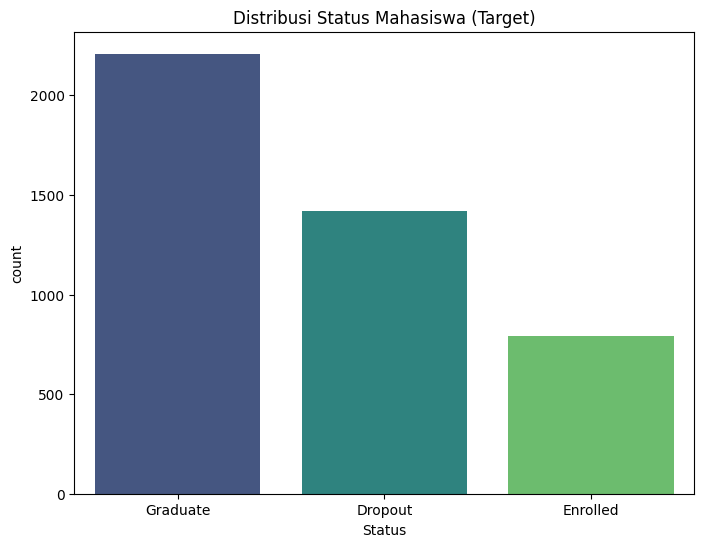

In [6]:
# Memeriksa distribusi nilai pada variabel target ('Status')
print("Distribusi Variabel Target 'Status':")
print(df['Status'].value_counts())

# Visualisasi distribusi target
plt.figure(figsize=(8, 6))
sns.countplot(x='Status', data=df, palette='viridis', order = df['Status'].value_counts().index)
plt.title('Distribusi Status Mahasiswa (Target)')
plt.show()

## **Exploratory Data Analysis (EDA)**

In [7]:
# Menampilkan semua nama kolom dalam dataframe
print(df.columns.tolist())

['Marital_status', 'Application_mode', 'Application_order', 'Course', 'Daytime_evening_attendance', 'Previous_qualification', 'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation', 'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'Age_at_enrollment', 'International', 'Curricular_units_1st_sem_credited', 'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_evaluations', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 'Curricular_units_1st_sem_without_evaluations', 'Curricular_units_2nd_sem_credited', 'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_evaluations', 'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Curricular_units_2nd_sem_without_evaluations', 'Unemployment_rate', 'Inflation_rate', 'GDP', 'Status']


<ipython-input-8-bcad0e9eb15b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1], data=df, x='Status', y='Curricular_units_1st_sem_approved', palette='coolwarm')


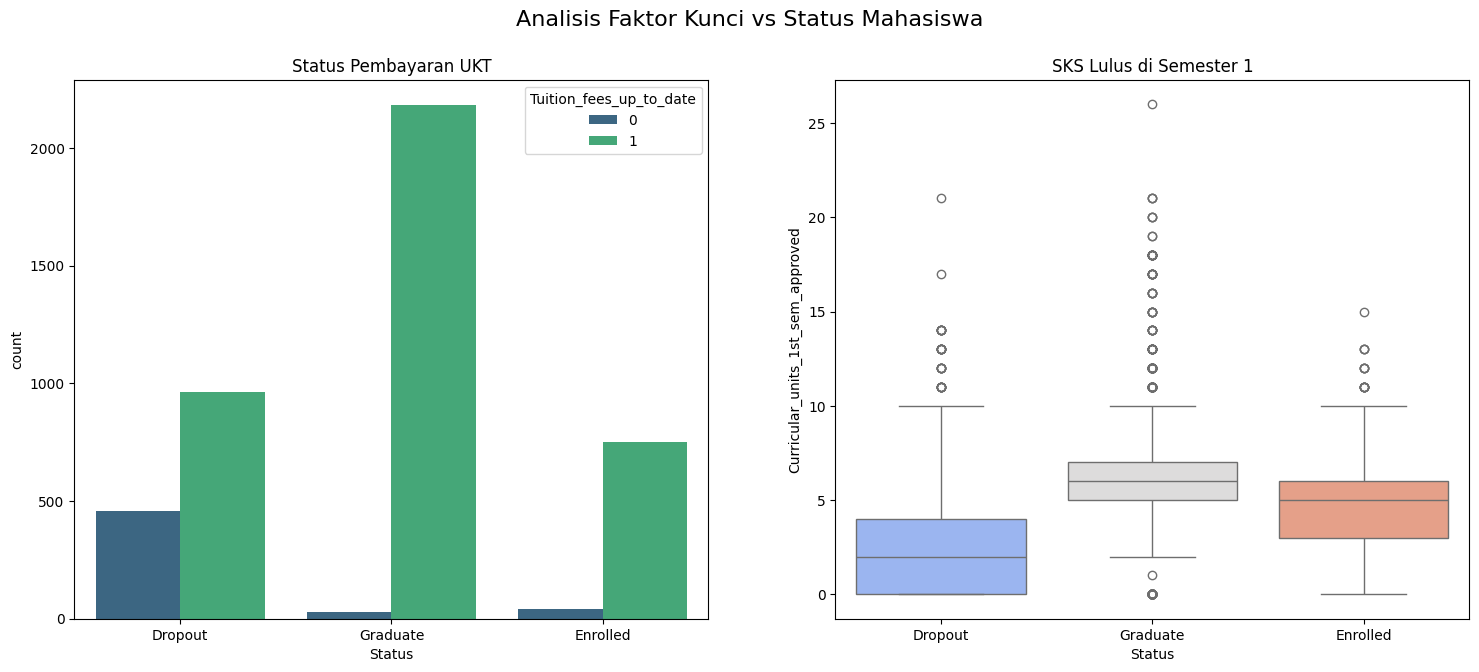

In [8]:
# Menggunakan nama kolom yang benar (dengan underscore)
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Analisis Faktor Kunci vs Status Mahasiswa', fontsize=16)

# Grafik 1: Status Pembayaran UKT
sns.countplot(ax=axes[0], data=df, x='Status', hue='Tuition_fees_up_to_date', palette='viridis')
axes[0].set_title('Status Pembayaran UKT')

# Grafik 2: Performa Akademik Semester 1
sns.boxplot(ax=axes[1], data=df, x='Status', y='Curricular_units_1st_sem_approved', palette='coolwarm')
axes[1].set_title('SKS Lulus di Semester 1')

plt.show()

**Insight EDA:**
1.  **Status UKT (`Tuition_fees_up_to_date`)** sangat berpengaruh. Mahasiswa yang menunggak (nilai 0) memiliki proporsi dropout yang jauh lebih tinggi.
2.  **Performa Akademik Awal (`Curricular_units_1st_sem_approved`)** juga krusial. Mahasiswa yang dropout cenderung memiliki jumlah SKS lulus yang sangat sedikit di semester pertama.


**Insight dari Diagram Kotak:**

-   Terlihat dengan sangat jelas bahwa mahasiswa yang berstatus **`Dropout`** memiliki median (garis tengah kotak) jumlah SKS lulus di semester 1 yang sangat rendah, yaitu mendekati nol. Sebaran datanya pun sangat sempit di bawah.
-   Sebaliknya, mahasiswa yang **`Graduate`** (Lulus) memiliki sebaran jumlah SKS yang jauh lebih tinggi dan lebih stabil.
-   Ini mengindikasikan bahwa **performa akademik di semester pertama adalah prediktor yang sangat kuat** untuk keberhasilan studi mahasiswa. Mahasiswa yang kesulitan di awal perkuliahan memiliki risiko tinggi untuk *dropout*.

## Data Preparation / Preprocessing

In [9]:
# Membuat salinan dataframe
df_prep = df.copy()

# Mengubah 'Status' menjadi biner (1 untuk Dropout, 0 untuk lainnya)
df_prep['Status'] = df_prep['Status'].map({'Dropout': 1, 'Enrolled': 0, 'Graduate': 0})

# Memisahkan fitur (X) dan target (y)
X = df_prep.drop('Status', axis=1)
y = df_prep['Status']

# Membagi data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Bentuk data latih (X_train): {X_train.shape}")
print(f"Bentuk data uji (X_test): {X_test.shape}")

Bentuk data latih (X_train): (3539, 36)
Bentuk data uji (X_test): (885, 36)


## Modeling

In [10]:
# Inisialisasi model Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, class_weight='balanced')

# Melatih model menggunakan data latih
print("Memulai proses training model...")
model.fit(X_train, y_train)
print("Model berhasil dilatih!")

Memulai proses training model...
Model berhasil dilatih!


## Evaluation

Accuracy: 0.8802
Precision: 0.8803
Recall: 0.7254
F1-score: 0.7954


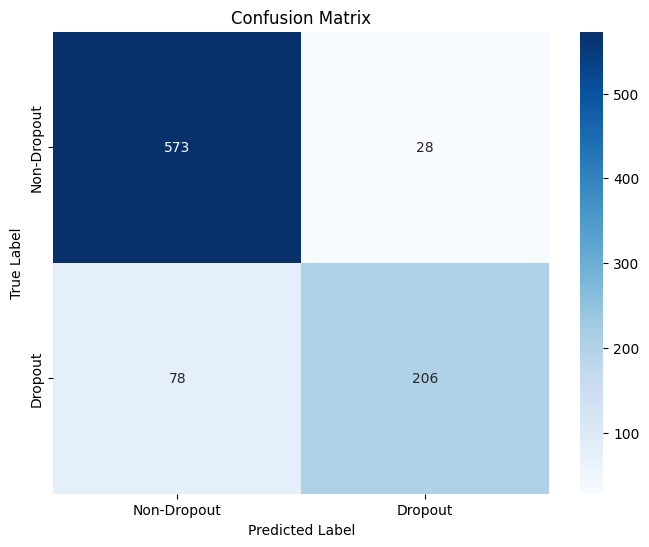

In [11]:
# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Menampilkan Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Dropout', 'Dropout'], yticklabels=['Non-Dropout', 'Dropout'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Menyimpan Model

In [13]:
import os

# Membuat direktori/folder 'model' jika belum ada
os.makedirs('model', exist_ok=True)

# Menyimpan model yang sudah dilatih
model_path = 'model/student_dropout_model.pkl'
joblib.dump(model, model_path)

print(f"Model berhasil disimpan di: {model_path}")

Model berhasil disimpan di: model/student_dropout_model.pkl
